In [1]:
import numpy as np
import matplotlib.pyplot as plt

Text(0, 0.5, 'Y')

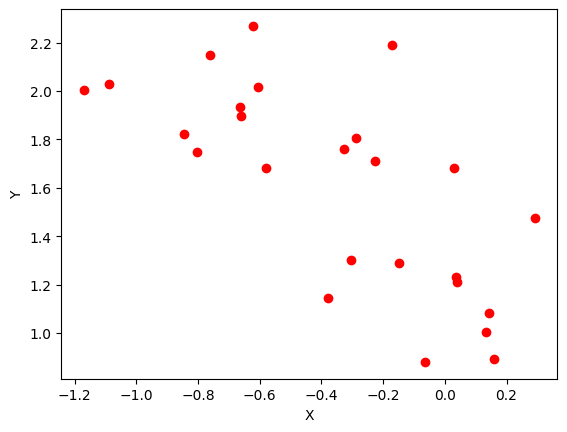

In [2]:
x = np.load("circle_data_2.npy") # \in \mathcal{R}^{2}
plt.figure(1)
plt.scatter(x[0], x[1], color = 'red', marker = 'o')
plt.xlabel("X")
plt.ylabel("Y")

In [3]:
c = np.array([-0.44638224, 1.50461084])   # LS center
R = 0.5930429544769911                    # LS radius
lam = 1.0                                 # λ₀ = 1
eps = 1e-6                                # stopping tolerance
max_iter = 100
eps_norm = 1e-12

In [4]:
grad_norms = []

print(f"{'Iter':>4} | {'λ':>8} | {'Cost':>12} | {'||g||':>10}")
print("-"*46)


for k in range(max_iter):
    # residuals: r_n = ||c - x_n|| - R
    d = np.sqrt((c[0] - x[0])**2 + (c[1] - x[1])**2)
    r = d - R

    # Jacobian: J_n = [ (c1 - x1n)/d_n, (c2 - x2n)/d_n, -1 ]
    # handle very small d by replacing with eps_norm
    d_safe = np.where(d < eps_norm, eps_norm, d)
    J = np.vstack([(c[0] - x[0]) / d_safe,
                   (c[1] - x[1]) / d_safe,
                   -np.ones_like(d_safe)]).T

    g = J.T @ r
    grad_norm = np.linalg.norm(g)
    grad_norms.append(grad_norm)
    f_old = np.sum(r**2)

    print(f"{k:4d} | {lam:8.3e} | {f_old:12.6e} | {grad_norm:10.3e}")

    if grad_norm < eps:
        break

    # Solve (J^T J + lambda I) delta = -J^T r
    H = J.T @ J + lam * np.eye(3)
    delta = np.linalg.lstsq(H, -g, rcond=None)[0]

    c_new = c + delta[:2]
    R_new = R + delta[2]

    # compute new cost
    d_new = np.sqrt((c_new[0] - x[0])**2 + (c_new[1] - x[1])**2)
    r_new = d_new - R_new
    f_new = np.sum(r_new**2)

    if f_new < f_old:           # valid step
        c, R = c_new, R_new
        lam *= 0.7
    else:                       # null step
        lam *= 2.0

print("-"*46)
print("Final LM center:", c)
print("Final LM radius:", R)

Iter |        λ |         Cost |      ||g||
----------------------------------------------
   0 | 1.000e+00 | 1.053504e+00 |  1.081e+00
   1 | 7.000e-01 | 9.873601e-01 |  2.113e-01
   2 | 4.900e-01 | 9.679623e-01 |  1.639e-01
   3 | 3.430e-01 | 9.532908e-01 |  1.304e-01
   4 | 2.401e-01 | 9.415944e-01 |  1.056e-01
   5 | 1.681e-01 | 9.319373e-01 |  8.671e-02
   6 | 1.176e-01 | 9.237799e-01 |  7.172e-02
   7 | 8.235e-02 | 9.168777e-01 |  5.903e-02
   8 | 5.765e-02 | 9.112079e-01 |  4.768e-02
   9 | 4.035e-02 | 9.068376e-01 |  3.736e-02
  10 | 2.825e-02 | 9.037624e-01 |  2.824e-02
  11 | 1.977e-02 | 9.018153e-01 |  2.061e-02
  12 | 1.384e-02 | 9.007068e-01 |  1.461e-02
  13 | 9.689e-03 | 9.001337e-01 |  1.012e-02
  14 | 6.782e-03 | 8.998603e-01 |  6.875e-03
  15 | 4.748e-03 | 8.997378e-01 |  4.582e-03
  16 | 3.323e-03 | 8.996854e-01 |  3.000e-03
  17 | 2.326e-03 | 8.996637e-01 |  1.936e-03
  18 | 1.628e-03 | 8.996550e-01 |  1.234e-03
  19 | 1.140e-03 | 8.996515e-01 |  7.808e-04
  20 | 7.

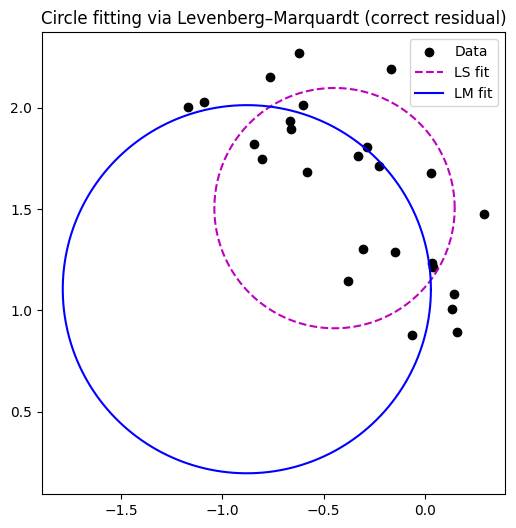

In [ ]:
#Plot circles
theta = np.linspace(0, 2*np.pi, 200)
circle_ls_x = -0.44638224 + 0.5930429544769911 * np.cos(theta)
circle_ls_y =  1.50461084 + 0.5930429544769911 * np.sin(theta)
circle_lm_x = c[0] + R * np.cos(theta)
circle_lm_y = c[1] + R * np.sin(theta)

plt.figure(figsize=(6,6))
plt.scatter(x[0], x[1], color='black', label='Data')
plt.plot(circle_ls_x, circle_ls_y, 'm--', label='LS fit')
plt.plot(circle_lm_x, circle_lm_y, 'b', label='LM fit')
plt.gca().set_aspect('equal')
plt.legend()
plt.title("Circle fitting via Levenberg–Marquardt (correct residual)")
plt.show()

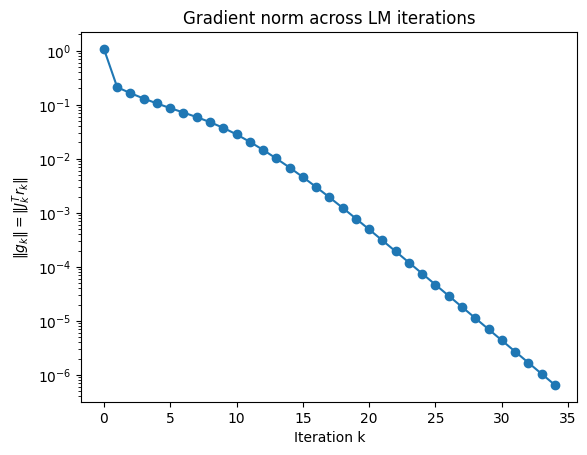

In [ ]:
#Plot gradient norm
plt.semilogy(grad_norms, 'o-')
plt.xlabel("Iteration k")
plt.ylabel(r"$\|g_k\| = \|J_k^T r_k\|$")
plt.title("Gradient norm across LM iterations")
plt.show()